In [ ]:
import seaborn as sns
import pandas as pd
titanic_data = sns.load_dataset('titanic')
df = pd.DataFrame(titanic_data)
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
print(df.head())
print(df.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [ ]:
print(df['age'].isnull().sum())


0


In [ ]:
df['age'] = df['age'].ffill()
print(df_ffill[['age']].head(10))


    age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
5  35.0
6  54.0
7   2.0
8  27.0
9  14.0


In [ ]:

df_bfill = df.copy()
df_bfill['age'] = df_bfill['age'].bfill()
print(df_bfill[['age']].head(10))

    age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
5  35.0
6  54.0
7   2.0
8  27.0
9  14.0


In [ ]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')
df = df.rename(columns={'deck': 'Cabin'})
df['Cabin'] = df['Cabin'].cat.add_categories(['unknown'])
missing_cabin_indices = df[df['Cabin'].isnull()].head(5).index
df.loc[missing_cabin_indices, 'Cabin'] = 'unknown'

df_cleaned = df.drop_duplicates()
print("🔹 'Cabin' column after filling 5 missing values:")
print(df['Cabin'].head(10))

print(df_cleaned)



🔹 'Cabin' column after filling 5 missing values:
0    unknown
1          C
2    unknown
3          C
4    unknown
5    unknown
6          E
7    unknown
8        NaN
9        NaN
Name: Cabin, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'unknown']
     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0      

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = sns.load_dataset('titanic')
df = df.dropna(subset=['sex'])
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])
print(df[['sex', 'sex_encoded']].head(10))


      sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1
5    male            1
6    male            1
7    male            1
8  female            0
9  female            0


In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = sns.load_dataset('titanic')
df = df.dropna(subset=['fare'])
scaler = StandardScaler()
df['fare_scaled'] = scaler.fit_transform(df[['fare']])
print(df[['fare', 'fare_scaled']].head(10))


      fare  fare_scaled
0   7.2500    -0.502445
1  71.2833     0.786845
2   7.9250    -0.488854
3  53.1000     0.420730
4   8.0500    -0.486337
5   8.4583    -0.478116
6  51.8625     0.395814
7  21.0750    -0.224083
8  11.1333    -0.424256
9  30.0708    -0.042956


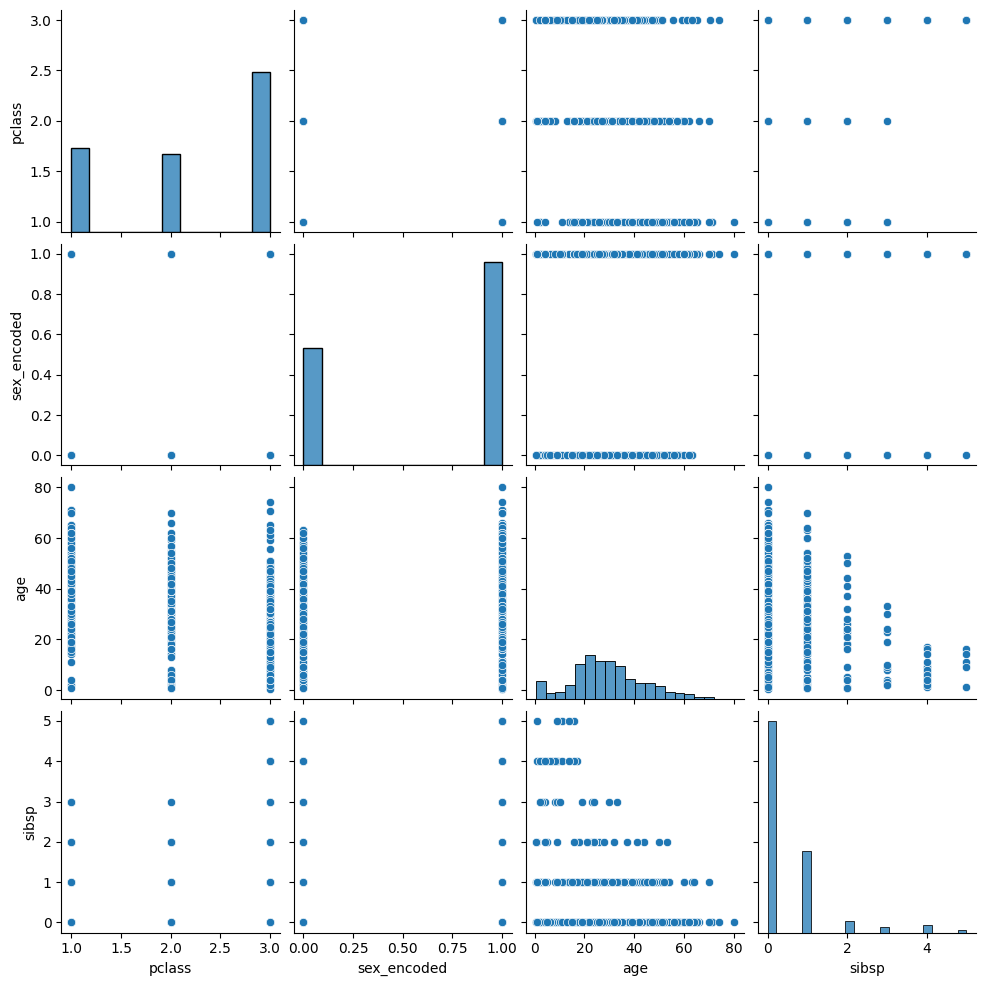

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')
df = df.dropna(subset=['pclass', 'sex', 'age', 'sibsp'])
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])
selected_df = df[['pclass', 'sex_encoded', 'age', 'sibsp']]
sns.pairplot(selected_df)
plt.show()


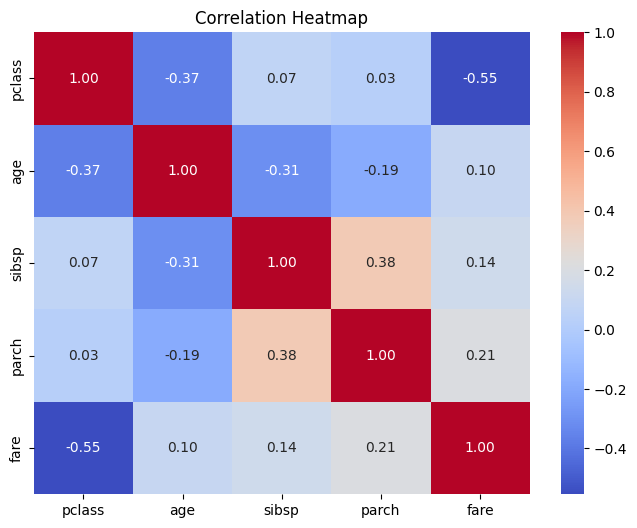

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')
features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
df_corr = df[features].dropna()
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
